## Titanic Prediction Competition

The idea of the competition is to predict if a passanger survives the sinking titanic using Machine Learning


#### Importing the relevant libraries

In [156]:
# Libraries and modules that I might need
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

#Apply to fix the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from sklearn.linear_model import LinearRegression

#### Load data

In [157]:
#Loading the train and test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


#View the first 3 rows of our training data to confirm file loading
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Exploring the data

In [158]:
#Viewing both the test and train data information

print("------------------------ TRAIN DATAFRAME INFO ------------------------\n")
print(train.info())
print("\n------------------------ TEST DATAFRAME INFO ------------------------\n")
print(test.info())

------------------------ TRAIN DATAFRAME INFO ------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

------------------------ TEST DATAFRAME INFO ------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-

The test Dataframe has no survived column since it's the outcome the model is to predict. Also, from first glance we can see that age has some missing value.

#### Visualize the numeric data distribution

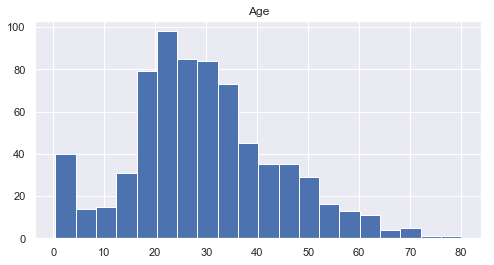

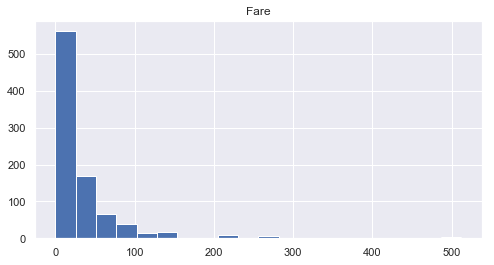

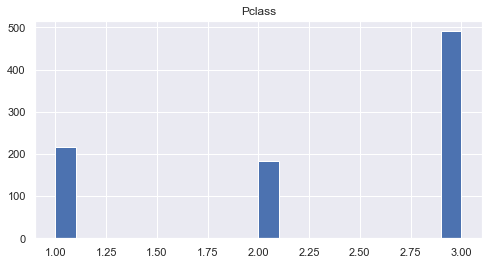

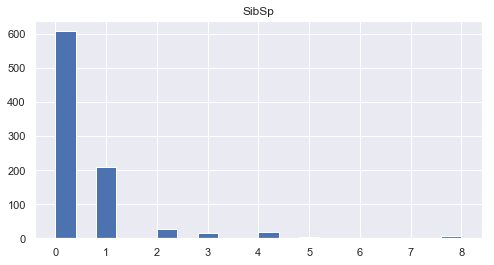

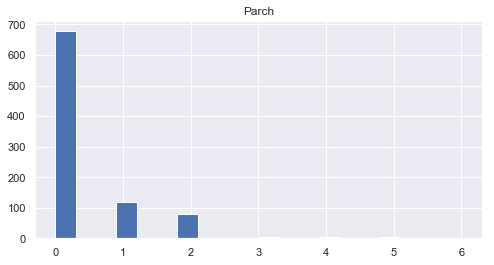

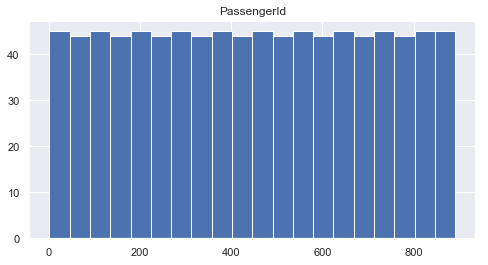

In [159]:
train_1 = ["Age", "Fare", "Pclass", "SibSp", "Parch", "PassengerId"]

for coln in train_1:
    train.hist(column = coln, bins = 20, figsize = (8,4))
    plt.title(coln)
plt.show()

### Data Summary:


#### Data Processing andhand hadling missing values

In [160]:
#Drop features we are not going to use from the test and train dataframe for consistency
train = train.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test = test.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

In [161]:
# Checking the data for missing values using .isnull()

print("------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------\n")
print(train.isnull().sum())

print("------------------------ TEST DATAFRAME MISSING VALUES COUNT ------------------------\n")
print(test.isnull().sum())

# Show the percentage of missing data on Age column on each dataframe
print(f"TRAIN DATAFRAME MISSING VALUES : {round(train['Age'].isnull().sum()*100/train.shape[0], 2)}%")
print(f"TEST DATAFRAME MISSING VALUES : {round(test['Age'].isnull().sum()*100/test.shape[0],2)}%")

------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
dtype: int64
------------------------ TEST DATAFRAME MISSING VALUES COUNT ------------------------

PassengerId     0
Pclass          0
Sex             0
Age            86
dtype: int64
TRAIN DATAFRAME MISSING VALUES : 19.87%
TEST DATAFRAME MISSING VALUES : 20.57%


In [162]:
#Fill in missing age values with the mean value to maintian a bell shaped distribution using .mean()

train.fillna(train.Age.mean(), inplace=True)
test.fillna(train.Age.mean(), inplace=True)

#Check to see if it was successfull
print("------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------\n")
print(train.info())

------------------------ TRAIN DATAFRAME MISSING VALUES COUNT ------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB
None


#### Prepare the data to be read by our algorithm

In [163]:
#Convert ['male','female'] to 1s and 0s so that our decision tree can be built
#Also, prepare the input which our decision tree classifier will use as an input and for  Logistic regression

for df in [train,test]:
    df['Sex_code']=df['Sex'].map({'male':1,'female':0})
    

#Select feature column names and target variable we are going to use for training
features = ['Pclass','Age','Sex_code']
target = 'Survived'

#Confirming the first 3 rows of the features  
train[features].head(3)

,Pclass,Age,Sex_code
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0


In [164]:
#Display first 3 target variables
train[target].head(3).values

array([0, 1, 1], dtype=int64)

This shows the prediction from the train dataframe

Example:

The first passenger 
-22 year-old male and Pclass 3 did not survive (0), 
The second passenger
38 year-old female and Pclass 1 Survived

Our classifier will use this to know what the output should be for the training instances.

### Model

##### Create and fit the decision tree

In [173]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier object with default hyperparameters
dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2)  

#Fit our classifier using the training features and the training target values
dtc.fit(train[features],train[target]) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Visualize default tree (optional)
This is not a necessary step, but it shows you how complex the tree is when you don't restrict it. 

In [174]:
#Create the decision tree ".dot" file


from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file='tree.dot',feature_names=features,rounded=True,filled=True,class_names=['Survived','Did not Survive'])


## Displaying the decision tree

- Blue on a node or leaf means the tree thinks the person did not survive
- Orange on a node or leaf means that tree thinks that the person survived

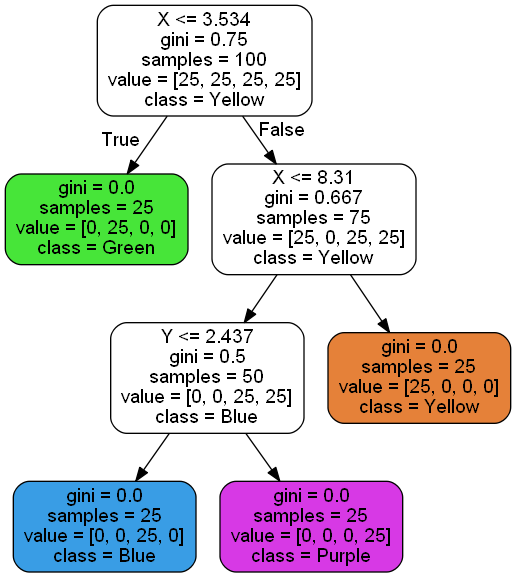

In [175]:
#Remove each '#' below to run the two lines below.
from IPython.core.display import Image, display
display(Image('tree.png', width=400, unconfined=True))

### Predictions


Our predictions are either 0s or 1s for each training instance based on the algorithm
- 1 for survived
- 0 for not survive

In [179]:
#Make predictions using the features from the test data set
predictions = dtc.predict(test[features])

predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Create csv to upload to Kaggle

In [180]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [181]:
#Convert from DataFrame to csv file 
file_name = 'Titanic Predictions 1.csv'

submission.to_csv(file_name,index=False)

file_name

'Titanic Predictions 1.csv'